<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Pandas (Nice)</span></div>

## 1 Seaborn

### 1.1 Setting the context

In [6]:

# Your code here
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_excel('finalised_scores.xlsx')

In [3]:
sns.set_context("paper")
sns.set_style("darkgrid")

### 1.2 Some Examples

C:\Users\Chin Zhen Jie\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


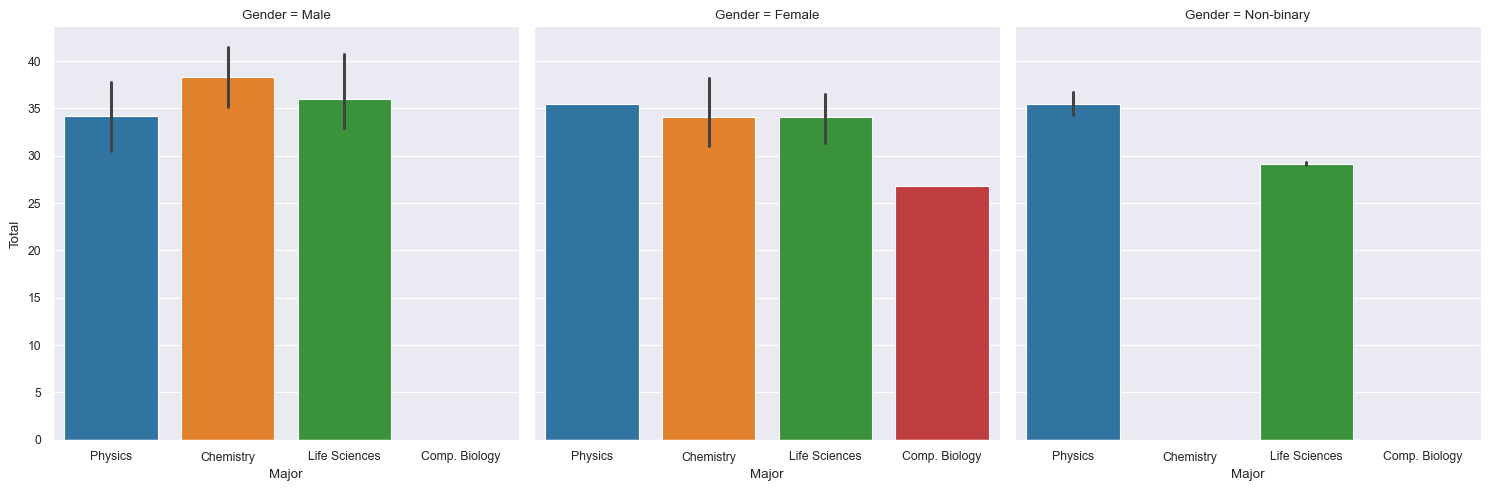

In [9]:

# Your code here
sns.catplot(data=df, x="Major", y="Total", col="Gender", kind="bar")
plt.show()

C:\Users\Chin Zhen Jie\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


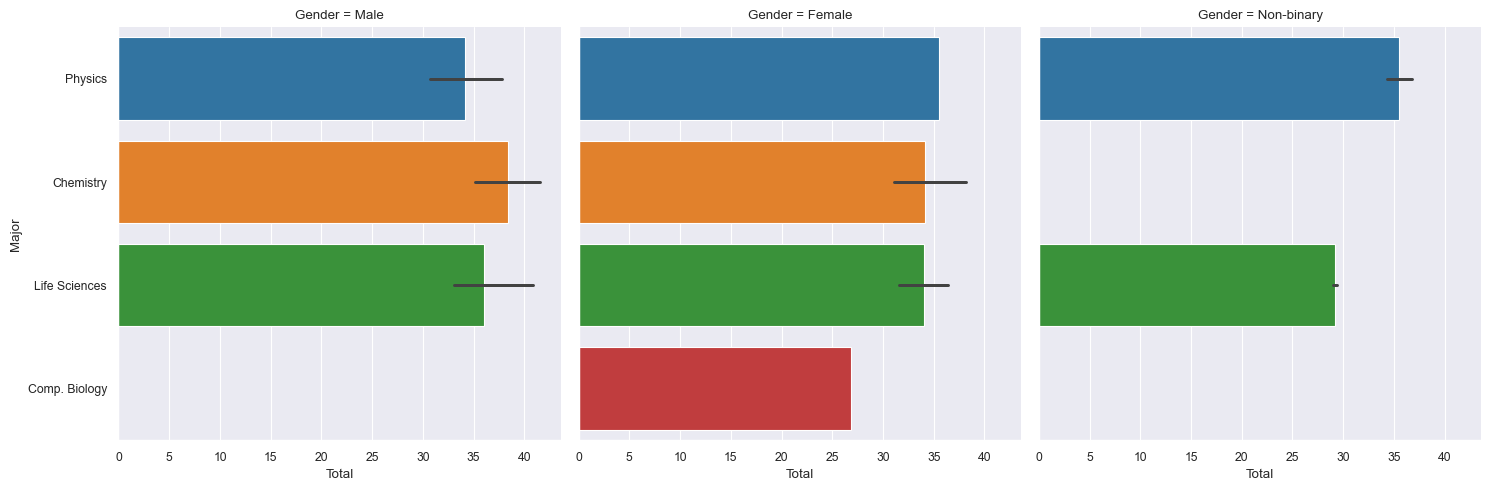

In [10]:
sns.catplot(data=df, x="Total", y="Major", col="Gender", kind="bar")
plt.show()

C:\Users\Chin Zhen Jie\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Chin Zhen Jie\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


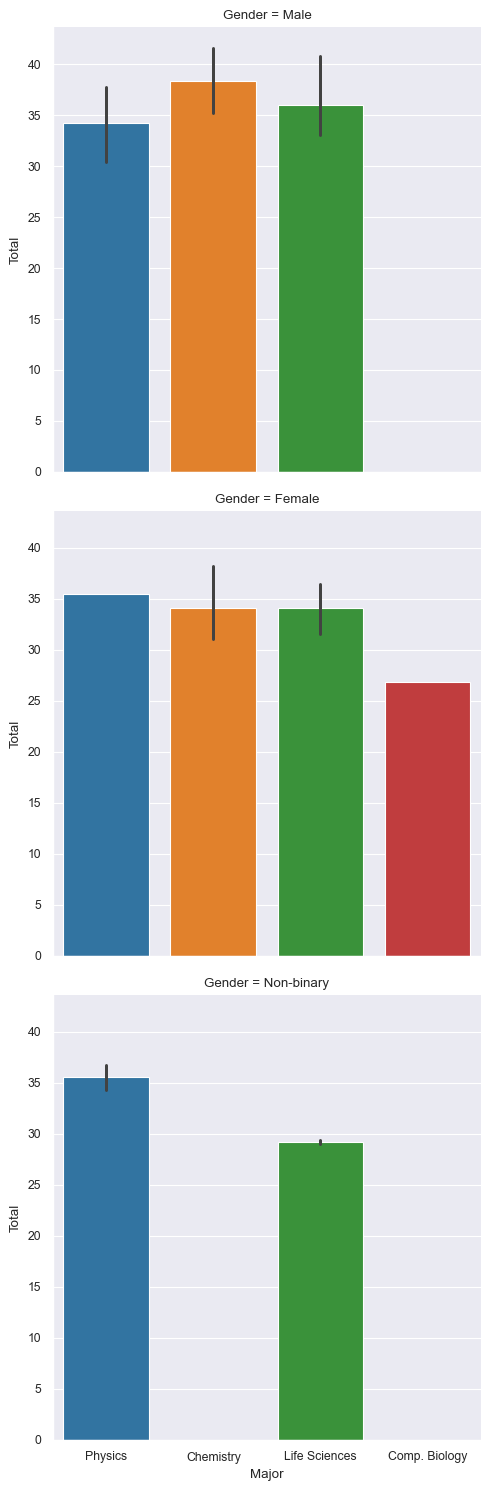

In [11]:
sns.catplot(data=df, x="Major", y="Total", row="Gender", kind="bar")
plt.show()

C:\Users\Chin Zhen Jie\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


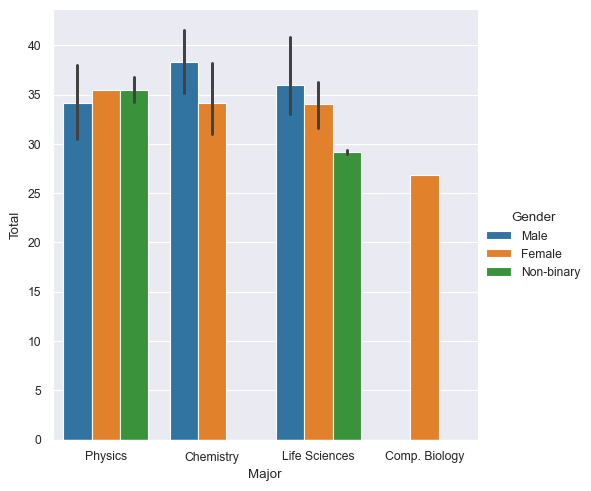

In [12]:
sns.catplot(data=df, x="Major", y="Total", hue="Gender", kind="bar")
plt.show()

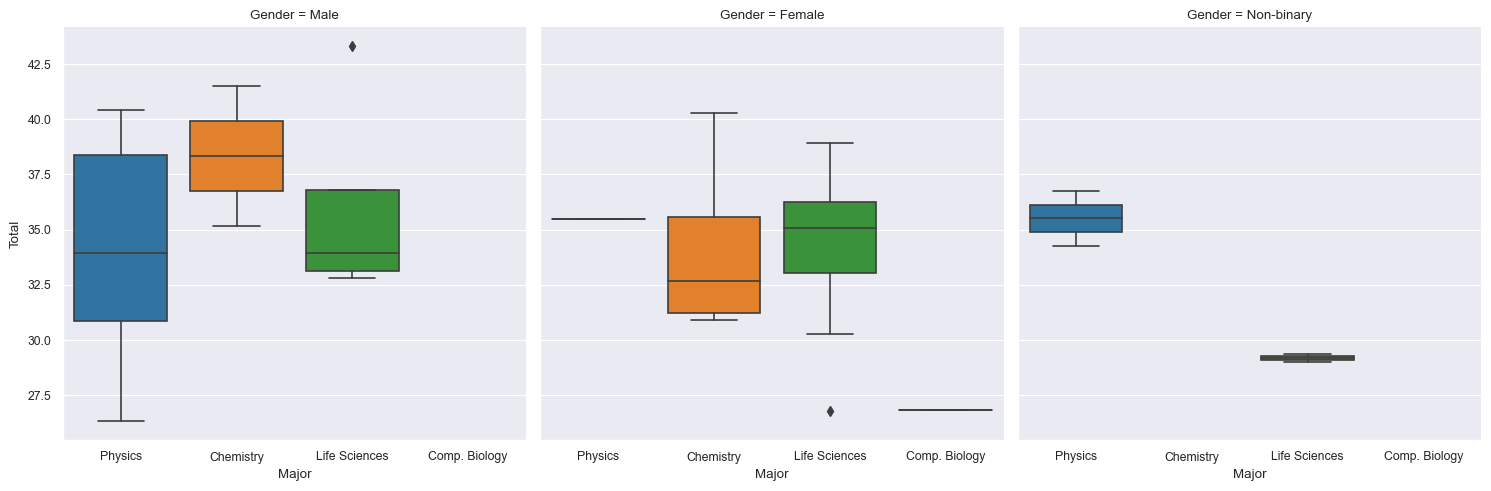

In [14]:
sns.catplot(data=df, x="Major", y="Total", col="Gender", kind="box")
plt.show()

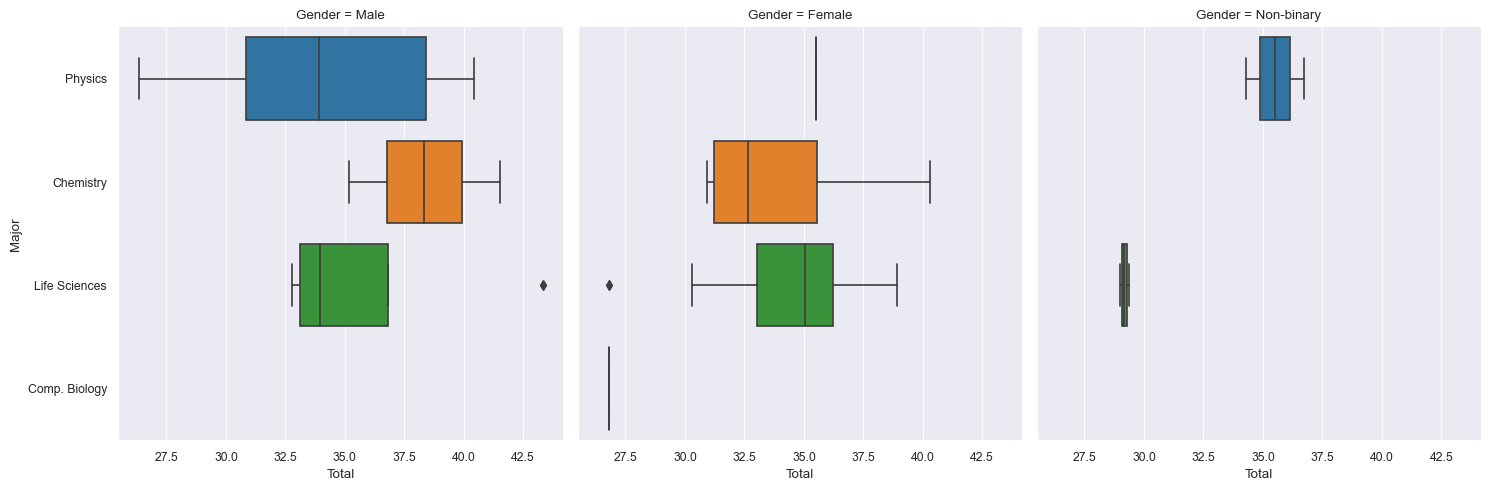

In [15]:
sns.catplot(data=df, x="Total", y="Major", col="Gender", kind="box")
plt.show()

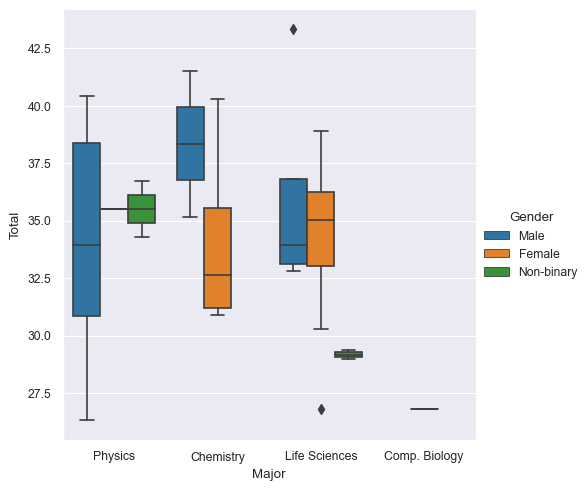

In [16]:
sns.catplot(data=df, x="Major", y="Total", hue="Gender", kind="box")
plt.show()

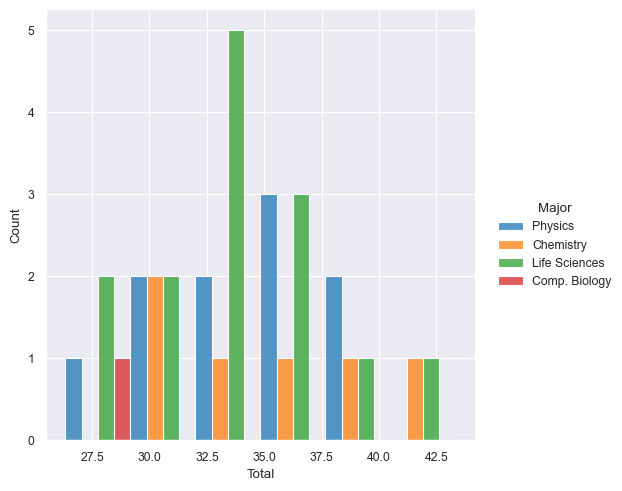

In [17]:
sns.displot(data=df, x='Total', hue='Major', multiple="dodge")
plt.show()

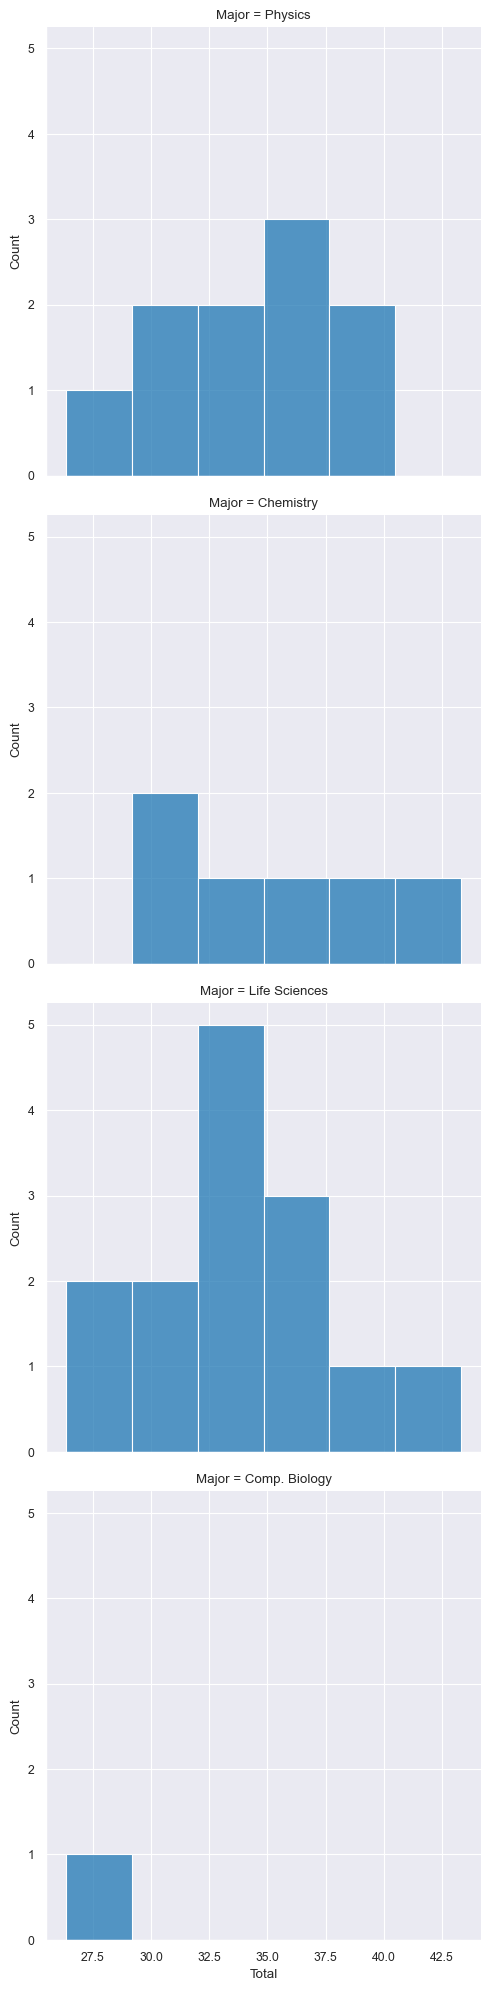

In [18]:
sns.displot(data=df, x='Total', row='Major', multiple="dodge")
plt.show()

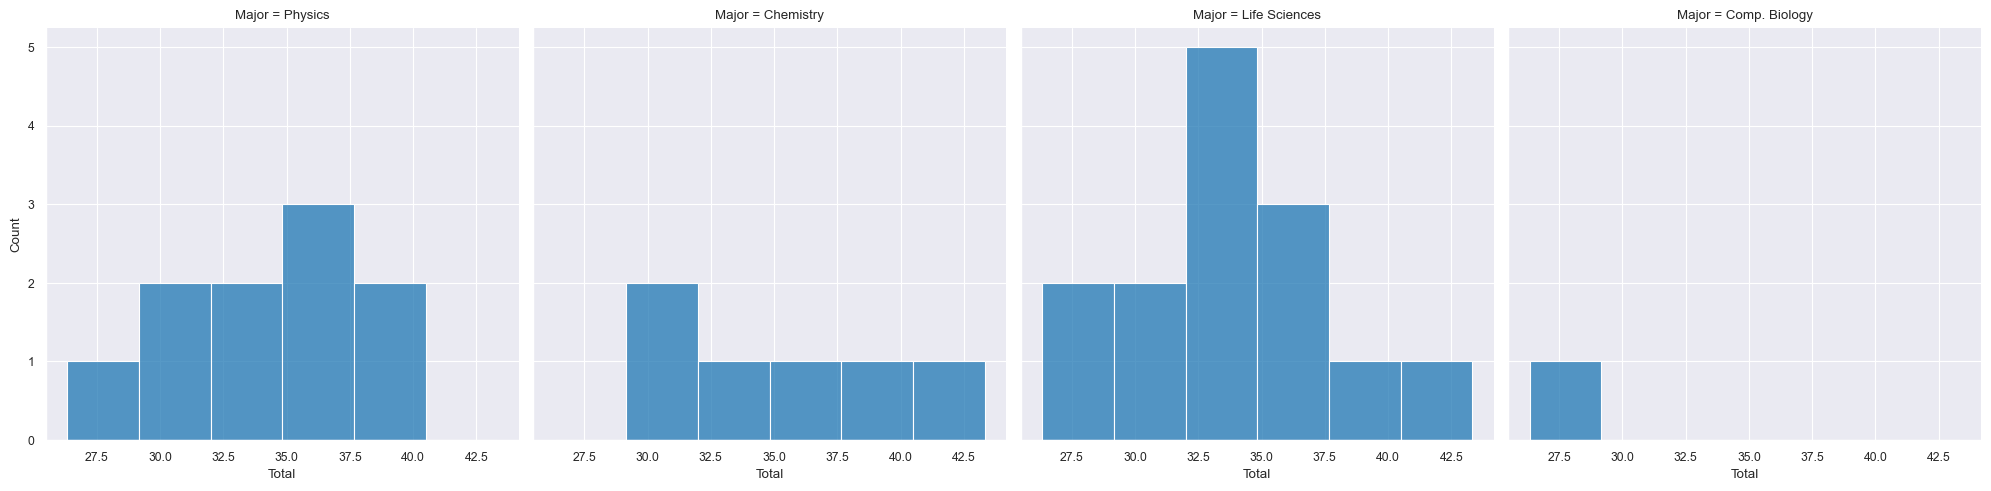

In [19]:
sns.displot(data=df, x='Total', col='Major', multiple="dodge")
plt.show()

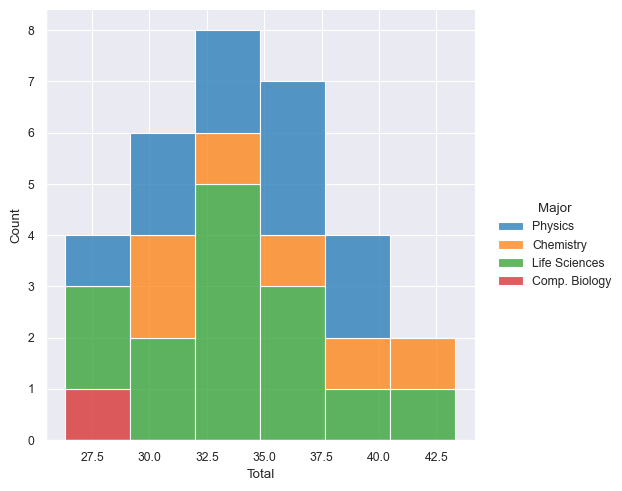

In [20]:
sns.displot(data=df, x='Total', hue='Major', multiple="stack")
plt.show()

## 2 A few more things

### 2.1 Merging dataframes

In [22]:

# Your code here
df_class_1 = pd.read_excel('dummy-class-1-of-2.xlsx')
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')
df_combined = pd.merge(
    left=df_class_1,           # dataframe 1
    right=df_class_2,          # dataframe 2
    how='outer',               # Join without losing any data
    left_on='Student No',      # Use to align dataframe 1
    right_on='Student No'      # Use to align dataframe 2
)

KeyError: 'Student No'

# Dont understand the left right inner outer thingamajig

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (4).

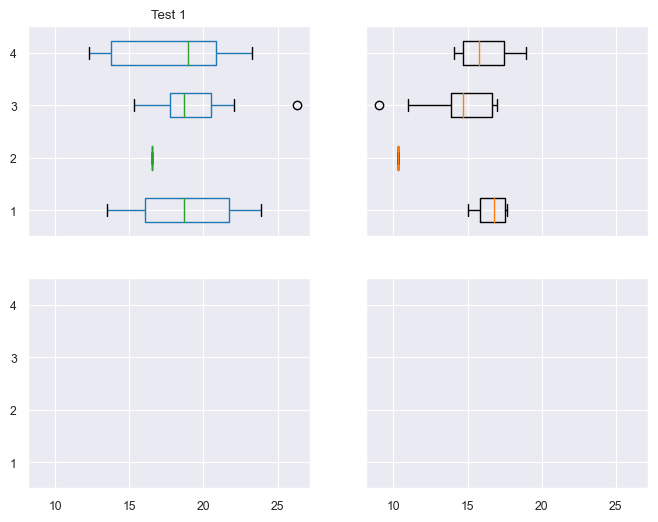

In [23]:
from matplotlib import pyplot as plt

df_class_1 = pd.read_excel('dummy-class-1-of-2.xlsx', skiprows=1)
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

# Combine the two datasets
df_combined = pd.merge(
    left=df_class_1,       # dataframe 1
    right=df_class_2,      # dataframe 2
    how='outer',           # Join without losing any data
    left_on='Student No',  # Use to align dataframe 1
    right_on='Student No'  # Use to align dataframe 2
)

# Rename columns
df_combined.rename(
    columns={'Student No': 'MATRIC_NO',
             'Test 1 (30%)': 'Test 1',
             'Test 2 (20%)': 'Test 2',
             'Test 3 (50%)': 'Test 3'},
    inplace=True
)

# Reorgnise/drop columns
df_combined = df_combined[['MATRIC_NO',
                           'Name', 'Major', 'Gender',
                           'Test 1', 'Test 2', 'Test 3']
                          ]

# Replace text with long forms
df_combined.replace(
    to_replace={
        'PHY': 'Physics',
        'CHM': 'Chemistry',
        'LS': 'Life Sciences',
        'CBIO': 'Comp. Biology',
        'F': 'Female',
        'M': 'Male',
        'NB': 'Non-binary'
    }, inplace=True
)

# Remove the ' from Test 2


def clean(text):
    '''
    Function to remove ' ' from column 'Test 2'.
    To be applied using apply()
    '''
    try:
        return text.replace("'", "")
    except AttributeError:
        # This will handle the NaN of the missing data
        return text


df_combined['Test 2'] = df_combined['Test 2'].apply(clean)

# Update column types
df_combined = df_combined.astype({
    'Gender': 'category',
    'Major': 'category',
    'Test 2': 'float'
}
)

# df_combined.fillna(0, inplace=True)                      # Fix missing scores
df_combined["Total"] = df_combined[['Test 1', 'Test 2', 'Test 3']].sum(axis=1)
df_combined = df_combined.round(2)
df_combined.to_excel('finalised_scores.xlsx', index=False)
df_combined.head()

df_combined.boxplot(by='Major',
                    column=['Test 1', 'Test 2', 'Test 3', 'Total'],
                    vert=False, figsize=(8, 6))
plt.show()

# Unsure if i messed up the file but copying and pasting resulted in a zhen jie L

### 2.2 isin()

In [27]:

# Your code here
mask = df_combined.isin(['Maryjane Sandoval', 'Ronin Christian'])
df_combined[mask]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ronin Christian,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Maryjane Sandoval,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_combined[mask].any(axis=0)

C:\Users\Chin Zhen Jie\AppData\Local\Temp\ipykernel_9444\80364009.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_combined[mask].any(axis=0)


MATRIC_NO    False
Name          True
Test 1       False
Test 2       False
Test 3       False
Total        False
dtype: bool

In [30]:
df_combined[mask].any(axis=1)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [32]:
df_combined[df_combined[mask].any(axis=1)]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
2,A5408925A,Ronin Christian,Physics,Male,18.37,15.56,43.75,77.68
7,A9194090U,Maryjane Sandoval,Life Sciences,Female,18.98,16.40,43.75,79.13


# Honestly dont know how the mask thing works as well, sadge

## Explore 1 :  Graduate Data

In [81]:
df_grad = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding = 'latin-1')

In [40]:
df_grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       1121 non-null   int64 
 1   university                 1121 non-null   object
 2   school                     1121 non-null   object
 3   degree                     1121 non-null   object
 4   employment_rate_overall    1121 non-null   object
 5   employment_rate_ft_perm    1121 non-null   object
 6   basic_monthly_mean         1121 non-null   object
 7   basic_monthly_median       1121 non-null   object
 8   gross_monthly_mean         1121 non-null   object
 9   gross_monthly_median       1121 non-null   object
 10  gross_mthly_25_percentile  1121 non-null   object
 11  gross_mthly_75_percentile  1121 non-null   object
dtypes: int64(1), object(11)
memory usage: 105.2+ KB


In [41]:
df_grad.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [43]:
df_grad.shape

(1121, 12)

In [82]:
import numpy as np
df_grad = df_grad.replace('na', np.nan)

In [83]:
pd.to_numeric(df_grad['basic_monthly_median'])

0       3200.0
1       2700.0
2       3000.0
3       3400.0
4       3500.0
         ...  
1116    3200.0
1117    4800.0
1118    4000.0
1119    4500.0
1120    3801.0
Name: basic_monthly_median, Length: 1121, dtype: float64

In [85]:
df_grad.head(25)

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
5,2013,Nanyang Technological University,College of Engineering,Bioengineering,81.3,68.8,2952,2900,3166,3125,2893,3365
6,2013,Nanyang Technological University,College of Engineering,Chemical and Biomolecular Engineering,87.3,85.1,3235,3000,3377,3200,3000,3800
7,2013,Nanyang Technological University,College of Engineering,Computer Engineering,90.3,88.2,3326,3100,3374,3175,3000,3600
8,2013,Nanyang Technological University,College of Engineering,Civil Engineering,94.8,93.8,3091,3000,3182,3100,3000,3380
9,2013,Nanyang Technological University,College of Engineering,Computer Science,92.1,88.5,3249,3000,3306,3125,3000,3600


In [95]:
df_bmm = df_grad[['year','university','basic_monthly_median']]
df_bmm

,year,university,basic_monthly_median
0,2013,Nanyang Technological University,3200
1,2013,Nanyang Technological University,2700
2,2013,Nanyang Technological University,3000
3,2013,Nanyang Technological University,3400
4,2013,Nanyang Technological University,3500
...,...,...,...
1116,2021,Singapore University of Social Sciences,3200
1117,2021,Singapore University of Technology and Design,4800
1118,2021,Singapore University of Technology and Design,4000
1119,2021,Singapore University of Technology and Design,4500


In [129]:
df_bmm.dtypes

year                      int64
university               object
basic_monthly_median    float64
dtype: object

In [128]:
df_bmm=df_bmm.astype({'basic_monthly_median': 'float'})

In [132]:
table = pd.pivot_table(df_bmm, values=['basic_monthly_median'], index = ['year', 'university'], aggfunc=['count', np.min, np.max, np.mean, np.median, np.std])

In [133]:
table

count  \
                                                   basic_monthly_median   
year university                                                           
2013 Nanyang Technological University                                32   
     National University of Singapore                                33   
     Singapore Management University                                 12   
2014 Nanyang Technological University                                33   
     National University of Singapore                                34   
     Singapore Institute of Technology                               24   
     Singapore Management University                                 12   
2015 Nanyang Technological University                                33   
     National University of Singapore                                36   
     Singapore Institute of Technology                               25   
     Singapore Management University                                 12   
     Singapore University of Technology and Design                    3   
2016 Nanyang Technological University                                34   
     National University of Singapore                                34   
     Singapore Institute of Technology                               26   
     Singapore Management University                                 12   
     Singapore University of Technology and Design                    3   
2017 Nanyang Technological University                                35   
     National University of Singapore                                37   
     Singapore Institute of Technology                               28   
     Singapore Management University                                 12   
     Singapore University of Technology and Design                    3   
2018 Nanyang Technological University                                37   
     National University of Singapore                                33   
     Singapore Institute of Technology                               32   
     Singapore Management University                                 12   
     Singapore University of Social Sciences                          3   
     Singapore University of Technology and Design                    4   
2019 Nanyang Technological University                                38   
     National University of Singapore                                36   
     Singapore Institute of Technology                               31   
     Singapore Management University                                 12   
     Singapore University of Social Sciences                          4   
     Singapore University of Technology and Design                    4   
2020 Nanyang Technological University                                40   
     National University of Singapore                                39   
     Singapore Institute of Technology                               37   
     Singapore Management University                                 12   
     Singapore University of Social Sciences                          7   
     Singapore University of Technology and Design                    4   
2021 Nanyang Technological University                                39   
     National University of Singapore                                38   
     Singapore Institute of Technology                               33   
     Singapore Management University                                 12   
     Singapore University of Social Sciences                          8   
     Singapore University of Technology and Design                    4   

                                                                   amin  \
                                                   basic_monthly_median   
year university                                                           
2013 Nanyang Technological University                            2500.0   
     National University of Singapore                            2650.0   
     Singapore 